In [10]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Load Data - We will start with loading the data into a variable, which we will use for further analysis

def load_data(path):
    df=pd.read_table(path,sep=';')
    return df

In [12]:
def intial_analysis(dataframe):
       
    print('\033[1m' + "\nDisplay the shape (columns and rows) of the dataset:" +'\033[0m' )
    print("\tcolumns : {}\n\trows : {}".format(dataframe.shape[0],dataframe.shape[1]))
    
    print('\033[1m' + "\nInformation about the dataset:" +'\033[0m')
    dataframe.info()
    
    print('\033[1m' + "\nDetails on Numerical and Categorical features within dataset:\n" + '\033[0m')
    #list the number of Numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    print("Numeric Columns:",numerical_feature_columns)
    
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    print("Categorical Columns:",categorical_feature_columns)
    

    print('\033[1m' + "\nPrint any null values within dataset:\n" + '\033[0m')
                
    labels = []
    values = []
    for col in dataframe.columns:
        labels.append(col)
        values.append(dataframe[col].isnull().sum())
        if values[-1]!=0:
            print(col, values[-1])

In [13]:
def c_value_counts(categorical_feature_columns):
    for var in categorical_feature_columns:
        print("<================ %s ================>" % var)
        print(pd.DataFrame({"Freq": df[var].value_counts(), 
                            "Freq_Perc": 100*df[var].value_counts()/sum(df[var].value_counts())}))
        print("\n")

In [14]:
from sklearn.model_selection import train_test_split

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

def split_dataset(df):
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)
    return X_train,X_test,y_train,y_test

In [15]:
from sklearn.preprocessing import LabelEncoder

def label_encode(x_train,x_test):
    X_transform = pd.DataFrame(x_train.apply(LabelEncoder().fit_transform))
    X_test_transform = pd.DataFrame(x_test.apply(LabelEncoder().fit_transform))
    return X_transform,X_test_transform

In [16]:
from sklearn.preprocessing import OneHotEncoder
def ohe_encode(X_train,X_test,category_index):
    X_cat= X_train.iloc[:,category_index]
    X_train=pd.concat([X_train,pd.get_dummies(X_cat,columns=X_cat.columns )], axis=1);
    X_train=X_train.drop(X_cat.columns, axis=1)

    X_cat_test= X_test.iloc[:,category_index]
    X_test=pd.concat([X_test,pd.get_dummies(X_cat_test,columns=X_cat_test.columns )], axis=1)
    X_test=X_test.drop(X_cat_test.columns, axis=1)
    return X_train, X_test


In [17]:
def visualise_data(data):
    scatter_matrix(data, alpha=0.2, figsize=(10, 12), diagonal='kde')
    return 

In [18]:
from sklearn.linear_model import LinearRegression
def linear_regression(X_train,y_train):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    return regressor

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def cross_validation_regressor(model,x_test,y_train):
    kf = KFold(n_splits=4, random_state=7)
    score = cross_val_score(model,x_train,y_train,cv=kf)
    return score.mean()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_predictor(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mse)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':r2},index=['name'])
    return model,y_pred,stats


In [21]:
from sklearn.linear_model import Lasso
def lasso(x_train,x_test,y_train,y_test,alpha):
    lass = Lasso(alpha=alpha,random_state=7)
    model = lass.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(lass,x_train,y_train)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':(model.score(x_test,y_test))},index=['name'])
    return model,y_pred,stats

In [22]:
from sklearn.linear_model import Ridge

def ridge(x_train,x_test,y_train,y_test,alpha):
    rid = Ridge(alpha=alpha,random_state=7,normalize=True)
    model = rid.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    val = cross_validation_regressor(rid,x_train,y_train)
    stats = pd.DataFrame({'cross_validation':val,
                         'rmse':rmse,'mse':mse,'mae':mae,'r2':model.score(x_test,y_test)},index=['name'])
    return model,y_pred,stats

In [23]:
def describe_df(df):
    a=x_train.apply(pd.value_counts)
    b=x_train.describe()
    return b,a

In [24]:
def plot_residuals(y_test,y_pred,name="Residual Plot"):
    residuals = y_test - y_pred
    plt.scatter(y_test,residuals)
    plt.title(name)

## Main Execution

In [25]:
path = r"C:\Users\divyakamat\python_git_repositories\linear_regression\Student Grade Prediction\dataset\student-mat.csv.txt"
df = load_data(path)

In [26]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
intial_analysis(df)


Display the shape (columns and rows) of the dataset:
	columns : 395
	rows : 33

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel 

In [28]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
c_value_counts(categorical_feature_columns)

<================ famsize ================>
     Freq  Freq_Perc
GT3   281  71.139241
LE3   114  28.860759


<================ higher ================>
     Freq  Freq_Perc
yes   375  94.936709
no     20   5.063291


<================ internet ================>
     Freq  Freq_Perc
yes   329  83.291139
no     66  16.708861


<================ address ================>
   Freq  Freq_Perc
U   307  77.721519
R    88  22.278481


<================ guardian ================>
        Freq  Freq_Perc
mother   273  69.113924
father    90  22.784810
other     32   8.101266


<================ Mjob ================>
          Freq  Freq_Perc
other      141  35.696203
services   103  26.075949
at_home     59  14.936709
teacher     58  14.683544
health      34   8.607595


<================ nursery ================>
     Freq  Freq_Perc
yes   314  79.493671
no     81  20.506329


<================ reason ================>
            Freq  Freq_Perc
course       145  36.708861
home         109  27

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


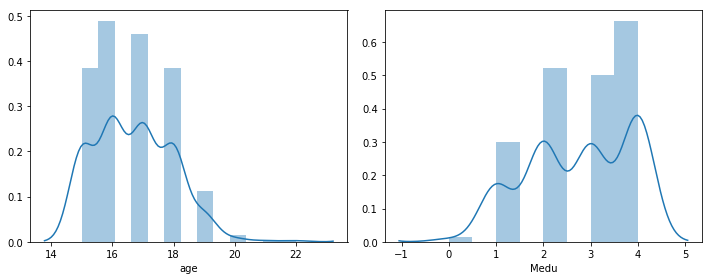

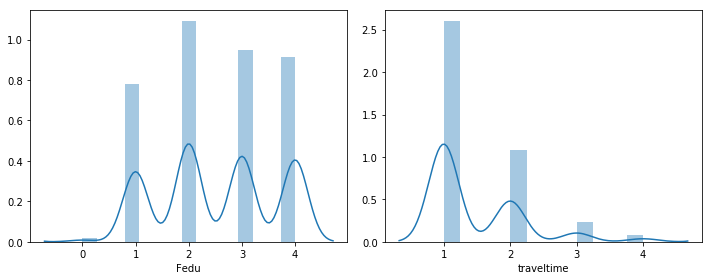

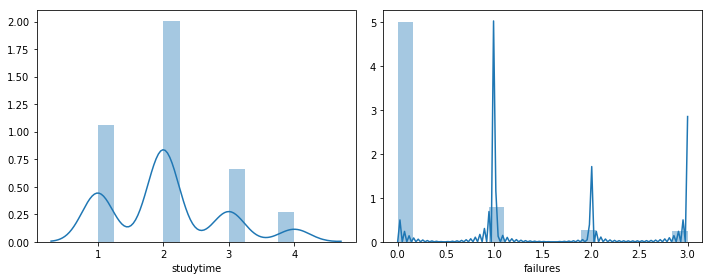

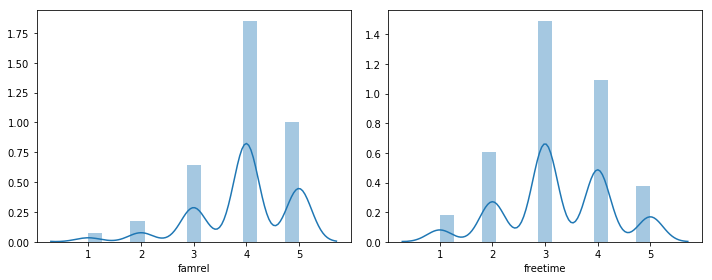

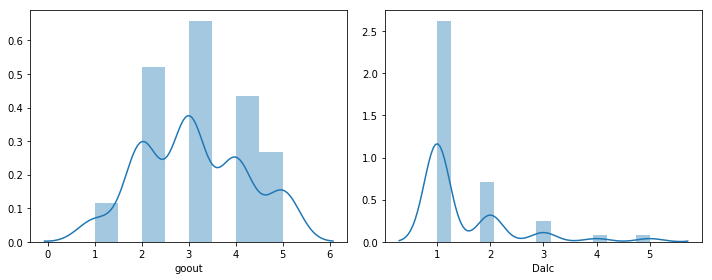

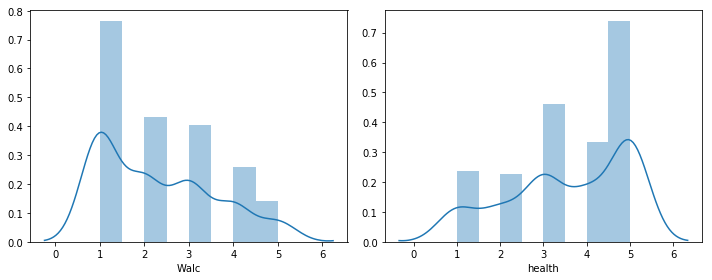

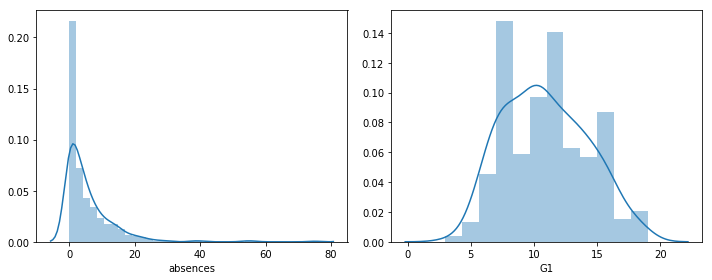

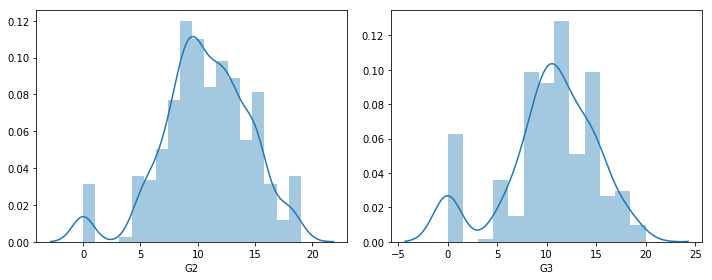

In [30]:
num_cols = list(df._get_numeric_data().columns)
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], hist=True, kde=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
      cross_validation       mae       mse        r2     rmse
name          0.797739  2.088564  6.261454  0.608604  2.50229


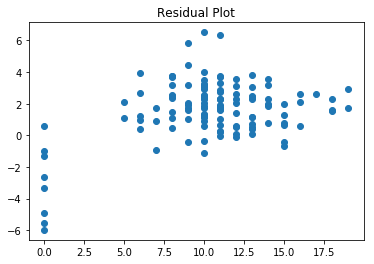

In [42]:
plt.switch_backend('agg')
category_index = [x for x in range(len(df.columns)) if df[df.columns[x]].dtype == 'object']

x_train, x_test, y_train, y_test =  split_dataset(df)
x_train,x_test = label_encode(x_train,x_test)

X_train,X_test = ohe_encode(x_train,x_test,category_index)

def linear_model(X_train, X_test, y_train, y_test):
    model = linear_regression(X_train,y_train)
    val = cross_validation_regressor(model,X_train,y_train)
    model,y_pred,stats = regression_predictor(model, X_test, y_test)
    return model,y_pred,stats

print(model)
print(stats)
plot_residuals(y_test,y_pred)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=7,
   selection='cyclic', tol=0.0001, warm_start=False)
      cross_validation       mae       mse       r2      rmse
name          0.835168  1.995374  5.502107  0.65607  2.345657


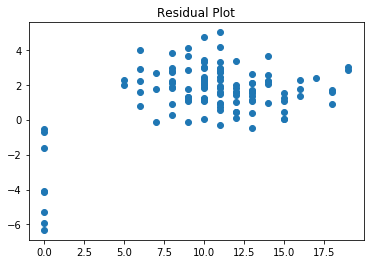

In [32]:
model,y_pred,stats = lasso(X_train,X_test,y_train,y_test,alpha=0.1)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=7, solver='auto', tol=0.001)
      cross_validation       mae      mse        r2      rmse
name          0.789081  2.227906  6.92455  0.567154  2.631454


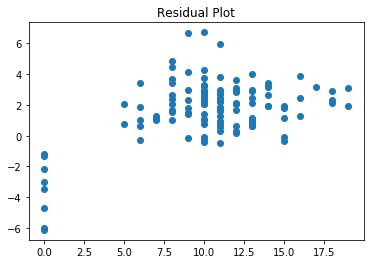

In [33]:
model,y_pred,stats = ridge(x_train,x_test,y_train,y_test,alpha=0.1)
print(model)
print(stats)
plot_residuals(y_test,y_pred)

In [34]:
def plot_corr(data):    
    #correlation matrix
    corrmat = data.corr()
    target='G3'
    f, ax = plt.subplots(figsize=(15, 15))
    #sns.heatmap(corrmat, vmax=.8, square=True);
    k = 30 #number of variables for heatmap
    cols = corrmat.nlargest(k, target)[target].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    return
    

In [35]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

np.random.seed(9)
def percentile_k_features(X,y, k=50):
    sp = SelectPercentile(f_regression,percentile=k)
    sp.fit_transform(X,y)
    features = X.columns.values[sp.get_support()]
    scores = sp.scores_[sp.get_support()]
    fs_score = list(zip(features,scores))
    df = pd.DataFrame(fs_score,columns=['Name','Score'])
    return df.sort_values(['Score','Name'],ascending = [False,True])['Name'].tolist()


In [36]:
def feature_selection(X,y,k=50):
    plot_corr(pd.concat([X,y],axis=1))
    return percentile_k_features(X,y,k)

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


   cross_validation       mae       mse        r2      rmse
0          0.797739  2.088564  6.261454  0.608604  2.502290
1          0.835168  1.995374  5.502107  0.656070  2.345657
2          0.789081  2.258456  7.077691  0.557582  2.660393
3          0.797739  1.977057  5.979231  0.626245  2.445247
4          0.835168  1.913477  5.369405  0.664365  2.317198
5          0.789081  2.160975  6.734564  0.579030  2.595104


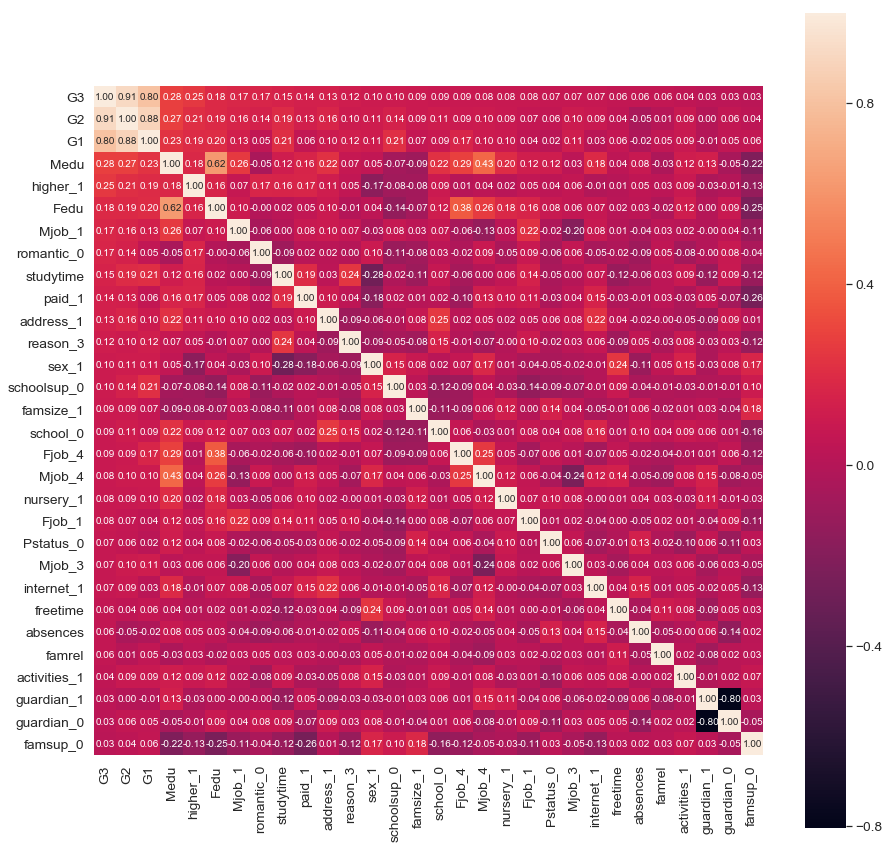

In [44]:
def create_stats(X_train, X_test, y_train, y_test,enc = "labelencoder"):
    a, b,lm_score=linear_model(X_train, X_test, y_train, y_test)
    c, d,lasso_score=lasso(X_train, X_test, y_train, y_test,alpha=0.1)
    e, f,ridge_score=ridge(X_train, X_test, y_train, y_test,alpha=0.1)
    best_features = feature_selection(X_train,y_train, k=50)
    a, b,lm_score_bf=linear_model(X_train[best_features], X_test[best_features], y_train, y_test)
    c, d,lasso_score_bf=lasso(X_train[best_features], X_test[best_features], y_train, y_test,alpha=0.1)
    e, f,ridge_score_bf=ridge(X_train[best_features], X_test[best_features], y_train, y_test,alpha=0.1)

    complete_stats = pd.concat([lm_score,lasso_score,ridge_score,lm_score_bf,lasso_score_bf,ridge_score_bf],ignore_index=True)
    return complete_stats#lm_score,lasso_score,ridge_score,lm_score_bf,lasso_score_bf,ridge_score_bf

complete_stats = create_stats(X_train, X_test, y_train, y_test)
print(complete_stats)